In [1]:

####################################################################################################
####################################################################################################

import sys
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import keras
from keras import backend as K
from keras import layers
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
import keras.utils.vis_utils
from keras.utils import plot_model

sys.path.append(os.path.abspath("../python_pax_reader"))
import waveformset as wfset

from helpers import *

plt.style.use('dbarge')


Using TensorFlow backend.


In [2]:

####################################################################################################
####################################################################################################

file_raw   = "../data_xenon_waveform/FakeWaveform_raw/XENON1T-0-000000000-000000999-000001000.zip"
file_truth = "../data_xenon_waveform/FakeWaveform_truth.csv"



In [3]:

####################################################################################################
####################################################################################################

nEventsGeant = 2

wfs = wfset.WaveformSet()

wfs.read_data_and_truth(file_raw, file_truth, nEventsGeant)



100%|██████████| 1000/1000 [00:03<00:00, 302.57it/s]


Events:    2
PMT Shape: (248,)


In [4]:

##########################################################################################
##########################################################################################

nEvent = 1

df_pmts = wfs.get_waveforms_in_channels(nEvent)
df_pmts = df_pmts.iloc[:, 0:127]

print(df_pmts.shape)


(350000, 127)


In [5]:

##########################################################################################
# True Time Window of S2 Pulse
##########################################################################################

df_truth = wfs.truth()[nEvent]
df_truth = df_truth.loc[df_truth['peak_type'] == 's2']

t0 = df_truth.iloc[0]['t_first_electron']
t1 = df_truth.iloc[0]['t_last_electron']

s0 = int(np.round(t0 / 10))
s1 = int(np.round(t1 / 10))

eps = (s1 - s0)*2.0
x0  = s0 - eps
x1  = s1 + eps



In [6]:

##########################################################################################
##########################################################################################

sum_waveforms = wfs.waveforms_in_channels[nEvent].drop("event_number", axis=1).iloc[:, 0:127].sum(axis=1).as_matrix()

sum_s2_all = np.sum(sum_waveforms[s0:s1])



In [7]:
#
###########################################################################################
###########################################################################################
#
#
#s2_sum_max = 0
#s2_sum_idx = -1
#
#for i in range(0, 127):
#
#    col = "channel_" + str(i)
#    
#    arr_pmt = df_pmts[:][col].as_matrix()
#
#    s2_sum = np.sum(arr_pmt[s0:s1])
#    
#    if (s2_sum > s2_sum_max):
#        
#        s2_sum_max = s2_sum
#        s2_sum_idx = i
#        
#    #print("PMT " + str(i) + ": " + str(s2_sum) )
#    
#    continue
    


In [8]:
#
###########################################################################################
###########################################################################################
#
#arr_s2_sum = np.zeros(0)
#arr_s2_idx = np.zeros(0)
#
#for i in range(0, 127):
#
#    col = "channel_" + str(i)
#    
#    arr_pmt = df_pmts[:][col].as_matrix()
#
#    s2_sum = np.sum(arr_pmt[s0:s1])
#
#    arr_s2_sum = np.append(arr_s2_sum, s2_sum)
#    arr_s2_idx = np.append(arr_s2_idx, int(i))
#
#    continue
#    
#    
###########################################################################################
###########################################################################################
#
#df_s2_sum = pd.DataFrame(data={'s2_sum': arr_s2_sum, 'pmt': arr_s2_idx})
#df_s2_sum = df_s2_sum.sort_values(['s2_sum'], ascending=False)
#df_s2_sum = df_s2_sum.reset_index(drop=True)




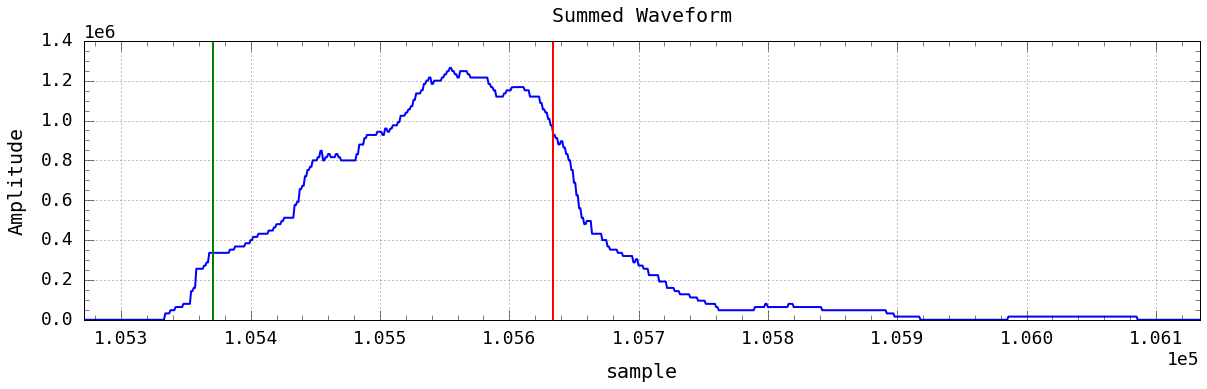

In [9]:

##########################################################################################
# Plot the S2 Time Window
##########################################################################################

f  = plt.figure(figsize=(20,5))
ax = plt.plot(sum_waveforms, color='b', label='S2 Waveform summed over 127 top PMTs')

plt.xlim([s0-100, s1+500])
plt.axvline(x=s0, color='g', label='t_first_electron (truth)')
plt.axvline(x=s1, color='r', label='t_last_electron  (truth)')
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Summed Waveform', y=1.05)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 1), useOffset=False)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 1), useOffset=False)

plt.savefig("plots/s2_waveform_window.png")

plt.close()

print()
display(f)
print()


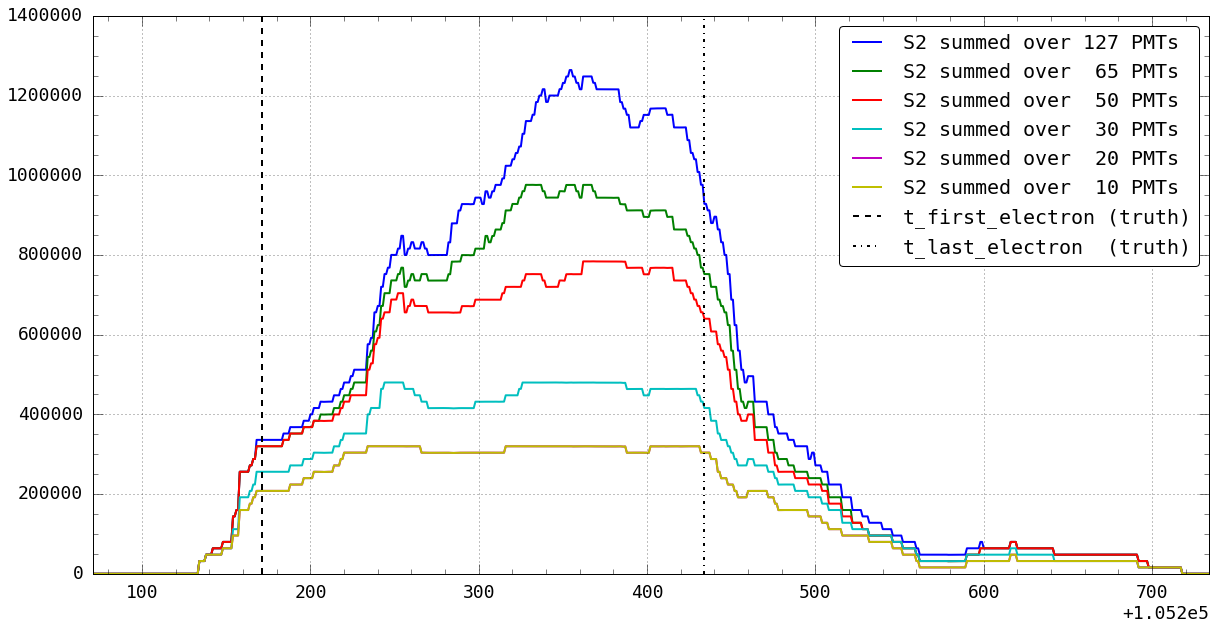

In [18]:

##########################################################################################
##########################################################################################

df_pmts_s2ranked = waveformIndexRankedByIntegral(df_pmts, s0, s1)

idxs_pmts_top127 = df_pmts_s2ranked.iloc[0:127, 0:1].as_matrix().reshape(127)
idxs_pmts_top65  = df_pmts_s2ranked.iloc[0: 65, 0:1].as_matrix().reshape(65)
idxs_pmts_top50  = df_pmts_s2ranked.iloc[0: 50, 0:1].as_matrix().reshape(50)
idxs_pmts_top30  = df_pmts_s2ranked.iloc[0: 30, 0:1].as_matrix().reshape(30)
idxs_pmts_top20  = df_pmts_s2ranked.iloc[0: 20, 0:1].as_matrix().reshape(20)
idxs_pmts_top10  = df_pmts_s2ranked.iloc[0: 10, 0:1].as_matrix().reshape(10)

x_127 = sumWaveformsOverPMTs(df_pmts, idxs_pmts_top127, s0, s1)
x_65  = sumWaveformsOverPMTs(df_pmts, idxs_pmts_top65 , s0, s1)
x_50  = sumWaveformsOverPMTs(df_pmts, idxs_pmts_top50 , s0, s1)
x_30  = sumWaveformsOverPMTs(df_pmts, idxs_pmts_top30 , s0, s1)
x_20  = sumWaveformsOverPMTs(df_pmts, idxs_pmts_top20 , s0, s1)
x_10  = sumWaveformsOverPMTs(df_pmts, idxs_pmts_top20 , s0, s1)


##########################################################################################
##########################################################################################

f = plt.figure(figsize=(20, 10))

plt.plot(x_127, label='S2 summed over 127 PMTs')
plt.plot(x_65 , label='S2 summed over  65 PMTs')
plt.plot(x_50 , label='S2 summed over  50 PMTs')
plt.plot(x_30 , label='S2 summed over  30 PMTs')
plt.plot(x_20 , label='S2 summed over  20 PMTs')
plt.plot(x_10 , label='S2 summed over  10 PMTs')

plt.axvline(x=s0, color='k', linestyle='dashed' , label='t_first_electron (truth)')
plt.axvline(x=s1, color='k', linestyle='dashdot', label='t_last_electron  (truth)')

plt.xlim([s0-100, s1+300])
plt.legend(fontsize=20)

f.savefig("plots/s2_summed_frac.png")
plt.close()

print()
display(f)
print()


In [13]:

###########################################################################################
###########################################################################################
#
#fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
#
#ax1 = plt.subplot(2, 1, 1)
#plt.xlim([x0, x1])
#plt.plot(sum_waveforms, color='b')
#plt.plot(sum_test     , color='y')
#
#plt.plot(df_pmt_max.as_matrix(), color='r')
#plt.axvline(x=s0, color='g')
#plt.axvline(x=s1, color='g')
#plt.xlabel('sample')
#plt.ylabel('Amplitude')
#plt.title('Summed Waveform')
#plt.grid(True)
#y0, y1 = ax1.get_ylim()
#
#plt.subplot(2, 1, 2)
#plt.xlim([x0, x1])
##plt.ylim([y0, y1])
#plt.plot(df_pmt_max.as_matrix())
#plt.axvline(x=s0, color='g')
#plt.axvline(x=s1, color='g')
#plt.xlabel('sample')
#plt.ylabel('Amplitude')
#plt.title('Single PMT Waveform')
#plt.grid(True)



In [14]:
    
##########################################################################################
# Plot the S2 contribution per PMT
##########################################################################################

arr_s2_idx = df_s2_sum.iloc[:, 0].as_matrix()
arr_s2_sum = df_s2_sum.iloc[:, 1].as_matrix()
arr_s2_sum = arr_s2_sum.reshape(arr_s2_sum.size, 1)
arr_s2_denom = sum_s2_all*np.ones(arr_s2_sum.size).reshape(arr_s2_sum.size, 1)
arr_s2_frac = np.divide(arr_s2_sum, arr_s2_denom)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.7)

ax1 = plt.subplot(2, 1, 1)
plt.plot(arr_s2_sum)
plt.xlim([0, 127])
plt.xlabel('PMT index in order of descending S2 fraction')
plt.ylabel('S2 Integral')
plt.title('S2 Integral vs. PMT', y=1.05)

ax2 = plt.subplot(2, 1, 2)
plt.plot(arr_s2_frac)
plt.xlim([0, 127])
plt.xlabel('PMT index in order of descending S2 fraction')
plt.ylabel('S2 Integral Fraction')
plt.title('S2 Integral Fraction vs. PMT', y=1.05)

f.savefig("plots/s2_integral_vs_pmt.png")

plt.close()

print()
display(f)
print()


NameError: name 'df_s2_sum' is not defined

In [ ]:

##########################################################################################
##########################################################################################

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

plt.subplot(2, 1, 1)
plt.plot(sum_waveforms)
plt.axvline(x=s0, color='r')
plt.axvline(x=s1, color='r')

plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Summed Waveform')
plt.grid(True)

plt.subplot(2, 1, 2)
#plt.plot(sum_waveforms)
plt.axvline(x=s0, color='r')
plt.axvline(x=s1, color='r')
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Single PMT Waveform')
plt.grid(True)


In [ ]:

####################################################################################################
####################################################################################################

print(df_train_input.shape)

arr_sums = np.zeros(0)
arr_idxs = np.zeros(0)

for i in range(0, df_train_input.shape[0]):
    
        df = df_train_input[i:i+1][:]
        
        df_sum = np.sum(df.as_matrix())
        
        arr_sums = np.append(arr_sums, df_sum)
        arr_idxs = np.append(arr_idxs, i)
        
        
        
arr_sums = np.sort(arr_sums)[::-1]

#print(arr_sums)

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [ ]:


####################################################################################################
# Create the data
####################################################################################################

x = df_train_input[0:10][:].as_matrix()
x = y.reshape(y.size)

g2 = np.tile(list("ABCDEFGHIJ"), 249)
df2 = pd.DataFrame(dict(x=x, g=g2))


####################################################################################################
# Initialize the FacetGrid object
####################################################################################################

pal2 = sns.cubehelix_palette(249, rot=-.25, light=.7)
#g2 = sns.FacetGrid(df2, row="g", hue="g", aspect=15, size=.5, palette=pal2)
g2 = sns.FacetGrid(df2, row="g", hue="g", aspect=10, palette=pal2)


####################################################################################################
# Draw the densities in a few steps
####################################################################################################

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g2.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g2.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g2.map(plt.axhline, y=0, lw=2, clip_on=False)


####################################################################################################
# Define and use a simple function to label the plot in axes coordinates
####################################################################################################

def label(x, color, label):
    
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

#g.map(label, "x")


####################################################################################################
####################################################################################################

g2.fig.subplots_adjust(hspace=-.25) # Set the subplots to overlap
g2.set_titles("")                   # Remove axes details that don't play will with overlap
g2.set(yticks=[])
g2.despine(bottom=True, left=True)
